# Poisson Distribution

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

## Scenario

> Some of the sky mermaids are early risers.
> They are also a vocal bunch who often contact their local MP to complain as soon as they wake up.
>
> On a typical day, the MP receives approximately 5% of complaints from concerned sky mermaids between 4am and 5am.
> The MP would like to model the distribution of complaints received between 4am and 5am on a "busy day".
>
> It can be taken that a "busy day" is defined as receiving 100 complaints, and assumed that the event of receiving a complaint is independent of all other complaints.

-----

## Questions

**(a)** Using the definition of a *busy day*, state the distribution that models the receipt of complaints by the local MP from sky mermaids between 4am and 5am.

**(b)** State a distribution which could be used as an approximation for the complaints received.

**(c)** Plot both of the distributions.

**(d)** What is the probability the MP will receive seven complaints from the sky mermaids between 4am and 5am? Calculate the probability using both the Binomial and Poisson distributions

**(e)** What is the probability the MP will receive no more that 10 complaints from the sky mermaids between 4am and 5am?

**(f)** What is the probability the MP will receive more than five complaints between 4am and 5am?

**(g)** 

-----

### (a)

Let $X$ be a random variable that represents the number of complaints received by the MP between 4am and 5am from the sky mermaids on a busy day.
Then $X$ can be modelled by a **binomial distribution**, with parameters $n=100$, $p=0.05$, so $X \sim B(100,0.05)$.

In [2]:
# declare the distribution
binomial_x = stats.binom(n=100, p=0.05)

### (b)

For large values of $n$ and small values of $p$, a random variable following the **binomial distribution**, $B(n, p)$, has approximately the same distribution as a random variable following the **Poisson distribution** with parameter $np$, so $B(n, p) \approx Poisson(np)$.

Given this, if the MP receives 100 complaints on a busy day, 5% of which arrive between 4am and 5am, then

$$
B(100, 0.05) \approx Poisson(5).
$$

In [3]:
# declare the poisson dist
poisson_x = stats.poisson(mu=5)

### (c)

In [4]:
# declare an array
range_x = np.arange(start=0, stop=19, step=1)

In [5]:
df_complaints = pd.DataFrame(data=range_x, columns={'x'})

In [7]:
df_complaints['Binomial: p(x)'] = binomial_x.pmf(df_complaints['x'])

In [8]:
df_complaints['Poisson: p(x)'] = poisson_x.pmf(df_complaints['x'])

[Text(0.5, 1.0, 'Binomial distribution: B(100, 0.05)'), Text(0, 0.5, 'p(x)')]

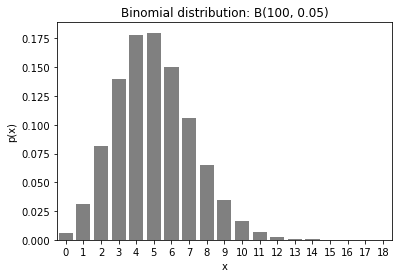

In [9]:
ax1 = sns.barplot(data=df_complaints,
                  x='x',
                  y='Binomial: p(x)',
                  color="grey")

ax1.set(title="Binomial distribution: B(100, 0.05)", ylabel="p(x)")

[Text(0.5, 1.0, 'Probability distribution: Poisson(5)'), Text(0, 0.5, 'p(x)')]

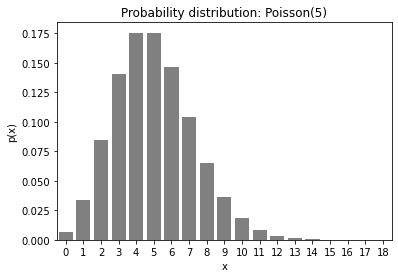

In [10]:
ax1 = sns.barplot(data=df_complaints,
                  x='x',
                  y='Poisson: p(x)',
                  color="grey")

ax1.set(title="Probability distribution: Poisson(5)", ylabel="p(x)")

### (d)

The probability the MP receives seven complaints between 4am and 5am is

#### Binomial

$$
P(X = 20) = p(20) = \binom{100}{7}0.05^{7}0.95^{93} = \ldots
$$

In [10]:
binomial_x.pmf(k=7)

0.10602553736478391

#### Poisson

The probability the MP receives seven complaints between 4am and 5am is

$$
P(X = 20) = p(20) = e^{-5} \bigg( \frac{5^{7}}{7!} \bigg) = \ldots
$$

In [11]:
poisson_x.pmf(k=7)

0.10444486295705395

### (e)

The probability the MP receives no more than 10 complaints from the sky mermaids between 4am and 5am is

#### Binomial

$$
P(X \leq 10) = F(10) = \sum_{k=0}^{10} \binom{100}{k}0.05^{k}0.95^{n-k} = \ldots
$$

In [12]:
binomial_x.cdf(x=10)

0.9885275899325152

#### Poisson

$$
P(X \leq 10) = F(10) = e^{-5} \sum_{k=0}^{10} \frac{5^{k}}{k!} = \ldots
$$

In [13]:
poisson_x.cdf(x=10)

0.9863047314016171

### (f)

The probability the MP will receive more than five complaints between 4am and 5am is

#### Binomial 

$$
P(X > 5) = 1 - F(5) = 1 - \sum_{k=0}^{5} \binom{100}{k}0.05^{k}0.95^{n-k} = \ldots
$$

In [14]:
binomial_x.sf(x=5)

0.38400087204385724

#### Poisson

$$
P(X > 5) = 1 - F(5) = 1 - \bigg( e^{-5} \sum_{k=0}^{5} \frac{5^{k}}{k!} \bigg) = \ldots
$$

In [15]:
poisson_x.sf(x=5)

0.384039345166937

-----

## (2)

After a number of cutting remarks from constituents about late replies to early complaints, 

### (a)

> State the model that best describes the waiting time between complaints for the MP, if they were to log on to their computer at 4am.

Let $T$ be a random variable that represents the waiting time between successive complaints.
The MP receives on average 5 complaints between 4am and 5am.
Therefore $T$ is modelled by the exponential distribution with parameter $\lambda=5$, so $T \sim M(5)$.

### (b)

> Plot the distribution for $T$.

Let us plot the p.d.f. in unit minutes, so we do not have to use decimal hours.

Use `np.arange()` to ceate an array for $t$.

In [16]:
# using step=60/1000 delivers us 1000 points
t = np.arange(start=0, stop=60, step=60/1000)

Declare the **DataFrame**

In [17]:
df_exp = pd.DataFrame(data=t, columns={'t'})

We'll need to convert the rate from **complaints per hour** to **compaints per minute**.
If the MP receives 5 complaints per hour, then they receive...

In [18]:
L_minutes = 5/60
print(L_minutes, "compaints per minute")

0.08333333333333333 compaints per minute


Construct the p.d.f. based on the new rate.

It does not make sense to calculate the p.d.f. for a specific time, as it is assumed $P(T=t)=0$, for all $t \in T$.
We can instead estimate $f(t)$ by calculating

$$
P(t < T < t+0.001) = F(t+0.001) - F(t).
$$

In [19]:
# declare the exponential distribution
exp_t = stats.expon(scale=1/L_minutes)

In [20]:
df_exp['pdf'] = exp_t.cdf(t+0.001) - exp_t.cdf(t)

Plot the estimated pdf

[Text(0.5, 1.0, 'Probability distribution: : M(1/12)'), Text(0, 0.5, 'f(t)')]

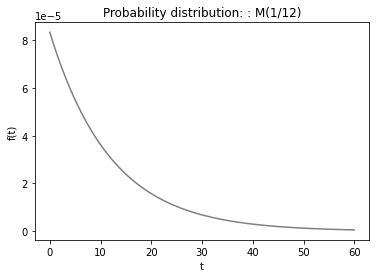

In [21]:
ax1 = sns.lineplot(data=df_exp,
                   x='t',
                   y='pdf',
                   color="grey")

ax1.set(title="Probability distribution: : M(1/12)", ylabel="f(t)")

### (c)

> The MP becomes stressed if they receive a complaint whilst still answering the previous complaint.
They estimate it takes them on average 4 minutes to answer a complaint.
>
> What is the probability they will receive a complaint during the time they answering another complaint?

The probability they will receive a complaint during the time they answering another complaint is

$$
P(T<4) = 1 - e^{-\lambda (4)} = \ldots
$$

In [22]:
exp_t.cdf(x=4)

0.28346868942621073

As a sanity check, let us check the answer using the rate/hour.
Converting minutes to hours, 4 minutes is 1/15 hours, so $P(T<1/15)$ (given a rate of 5/hour) is

In [23]:
# declare a new distribution first
hour_exp_t = stats.expon(scale=1/5)
hour_exp_t.cdf(x=1/15)

0.28346868942621073

It's reassuring that they match!

### (d)

> During the hour, the MP plans to make themselves some breakfast.
They estimate it will take them 12 minutes to make a bacon sandwich.
>
> Assuming they begin to make the sandwich immediately after receiving a complaint, what is the probability they do not receive another complaint during the time they are away?

The probability the MP does not receive another complaint during the time they are away making breakfast is

$$
P(T>12) = 1 - P(T<12) = 1 - F(12) = 1 - (1 - e^{-\lambda (12)} = e^{-\lambda (12)} = \ldots
$$

In [24]:
exp_t.sf(x=12)

0.36787944117144233

Another sanity check.

In [25]:
hour_exp_t.sf(x=0.2)

0.36787944117144233